Setup and Image Detection

In [ ]:
!pip install -q ultralytics opencv-python-headless matplotlib pillow

In [ ]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
from PIL import Image
from google.colab import files

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
uploaded = files.upload()
if uploaded:
  file_name = list(uploaded.keys())[0]
  print("Uploaded:", file_name)
else:
  print("No file uploaded.")
  file_name = None

No file uploaded.


In [ ]:
model=YOLO('yolov8n.pt')

In [ ]:
if file_name:
  results = model(file_name)
  annotated = results[0].plot()

In [ ]:
if 'annotated' in locals():
  plt.figure(figsize=(12,8))
  plt.imshow(cv2.cvtColor(annotated,cv2.COLOR_BGR2RGB))
  plt.axis('off')
else:
  print("No annotated image to display. Please upload an image first.")

No annotated image to display. Please upload an image first.


Object Detection on Video

In [ ]:
from google.colab import files

uploaded=files.upload()
if uploaded:
  video_path=list(uploaded.keys())[0]
  print("Uploaded:",video_path)
else:
  print("No file uploaded.")
  video_path = None

Saving WhatsApp Video 2025-09-17 at 18.27.39_ee2ee209.mp4 to WhatsApp Video 2025-09-17 at 18.27.39_ee2ee209.mp4
Uploaded: WhatsApp Video 2025-09-17 at 18.27.39_ee2ee209.mp4


In [ ]:
import cv2
import tempfile
from google.colab import files
from ultralytics import YOLO

model = YOLO('yolov8n.pt') # Load the model

output_path="output_detected.mp4"
if video_path:
  cap=cv2.VideoCapture(video_path)
  width=int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
  height=int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
  fps=cap.get(cv2.CAP_PROP_FPS)or 25.0
  fourcc=cv2.VideoWriter_fourcc(*'mp4v')
  out=cv2.VideoWriter(output_path,fourcc,fps,(width,height))

  frame_count=0
  while True:
    ret, frame= cap.read()
    if not ret:
      break
    results=model(frame)
    annotated=results[0].plot()
    out.write(annotated)
    frame_count+=1
    if frame_count%50==0:
      print(f"Processed {frame_count} frames")
  cap.release()
  out.release()

  print("Video Saved:",output_path)
  files.download(output_path)
else:
  print("No video uploaded. Please upload a video first.")


0: 640x384 7 persons, 1 dining table, 1 cell phone, 188.9ms
Speed: 7.5ms preprocess, 188.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 7 persons, 1 dining table, 1 cell phone, 169.3ms
Speed: 4.5ms preprocess, 169.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 7 persons, 1 dining table, 1 cell phone, 173.5ms
Speed: 5.9ms preprocess, 173.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 6 persons, 1 cell phone, 189.5ms
Speed: 5.6ms preprocess, 189.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 7 persons, 1 cell phone, 173.7ms
Speed: 5.7ms preprocess, 173.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 8 persons, 1 cell phone, 174.8ms
Speed: 5.6ms preprocess, 174.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 8 persons, 1 dining table, 1 cell phone, 171.9ms
Speed: 6.1ms preprocess, 171.9ms 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Live Webcam Detection

In [ ]:
!pip install -q ultralytics opencv-python-headless pillow
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
from base64 import b64decode
from google.colab import output

model = YOLO('yolov8n.pt')


def take_photo(filename='snapshot.jpg'):
    js = """
    async function takePhoto() {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
      document.body.appendChild(div);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize window
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture button
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getTracks().forEach(track => track.stop());
      const imgData = canvas.toDataURL('image/jpeg').split(',')[1];
      div.remove();
      return imgData;
    }
    takePhoto();
    """
    data = output.eval_js(js)
    with open(filename, 'wb') as f:
        f.write(b64decode(data))
    return filename

filename = take_photo('snapshot.jpg')
print("Captured:", filename)


results = model(filename)
annotated = results[0].plot()
plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


MessageError: NotAllowedError: Permission denied

In [ ]:
from google.colab import files
import glob
import cv2
import matplotlib.pyplot as plt


uploaded = files.upload()


for img_name in uploaded.keys():
    print(f"Processing {img_name}...")
    results = model(img_name)
    annotated = results[0].plot()
    plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

MINI YOLO TRAINING

In [ ]:
!pip install ultralytics
from ultralytics import YOLO

In [ ]:
model=YOLO('yolov8n.pt')

In [ ]:
!curl -L "https://github.com/ultralytics/assets/releases/download/v0.0.0/coco128.zip" -o coco128.zip
!unzip -q coco128.zip -d dataset
!ls dataset/coco128

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 6819k  100 6819k    0     0  6459k      0  0:00:01  0:00:01 --:--:-- 19.0M
images	labels	LICENSE  README.txt


In [ ]:
%%writefile dataset/coco128.yaml
path: dataset/coco128
train: images/train2017
val: images/train2017

nc: 80
names:
  0: person
  1: bicycle
  2: car
  3: motorcycle
  4: airplane
  5: bus
  6: train
  7: truck
  8: boat
  9: traffic light
  10: fire hydrant
  11: stop sign
  12: parking meter
  13: bench
  14: bird
  15: cat
  16: dog
  17: horse
  18: sheep
  19: cow
  20: elephant
  21: bear
  22: zebra
  23: giraffe
  24: backpack
  25: umbrella
  26: handbag
  27: tie
  28: suitcase
  29: frisbee
  30: skis
  31: snowboard
  32: sports ball
  33: kite
  34: baseball bat
  35: baseball glove
  36: skateboard
  37: surfboard
  38: tennis racket
  39: bottle
  40: wine glass
  41: cup
  42: fork
  43: knife
  44: spoon
  45: bowl
  46: banana
  47: apple
  48: sandwich
  49: orange
  50: broccoli
  51: carrot
  52: hot dog
  53: pizza
  54: donut
  55: cake
  56: chair
  57: couch
  58: potted plant
  59: bed
  60: dining table
  61: toilet
  62: tv
  63: laptop
  64: mouse
  65: remote
  66: keyboard
  67: cell phone
  68: microwave
  69: oven
  70: toaster
  71: sink
  72: refrigerator
  73: book
  74: clock
  75: vase
  76: scissors
  77: teddy bear
  78: hair drier
  79: toothbrush

Writing dataset/coco128.yaml


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
model.train(
    data="/content/dataset/coco128.yaml",
    epochs=10,
    imgsz=640,
    project="YOLO_Training",
    name="yolov8n_custom"
)

Ultralytics 8.3.201 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/coco128.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_custom, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d56d255a480>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
results=model.predict("/content/dataset/coco128/images/train2017/000000000110.jpg",save=True)


image 1/1 /content/dataset/coco128/images/train2017/000000000110.jpg: 480x640 10 persons, 3 pizzas, 4 chairs, 3 dining tables, 230.4ms
Speed: 2.6ms preprocess, 230.4ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/runs/detect/predict16


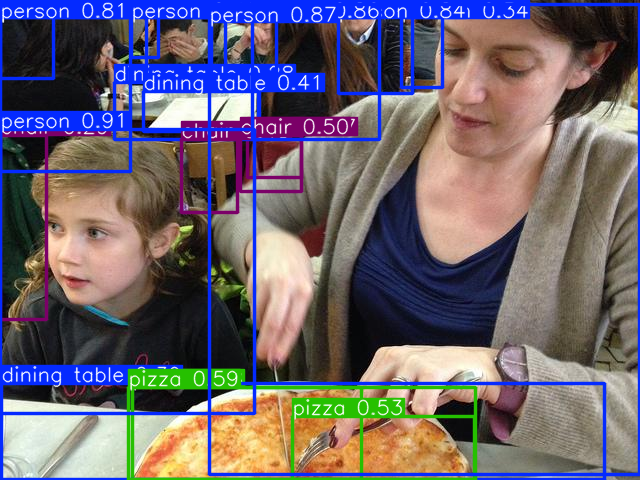

In [ ]:
results[0].show()

Build a Simple Streamlit App

In [ ]:
!pip install streamlit==1.38.0 ultralytics==8.3.0 pyngrok==7.1.6 opencv-python-headless pillow pandas

In [ ]:
%%writefile app_streamlit.py
import streamlit as st
from ultralytics import YOLO
import numpy as np
from PIL import Image
import cv2, tempfile, os, glob
import pandas as pd
from pathlib import Path

# Page setup
st.set_page_config(page_title="Object Detection using AI", layout="wide")
background_url = "https://i.ibb.co/NnrqBN05/By-Shruti-3.png"

# Custom CSS
st.markdown(
    f"""
    <style>
    /* App background */
    .stApp {{
        background: url("{background_url}") no-repeat center center fixed;
        background-size: cover;
    }}

    /* Main title */
    .custom-title {{
        font-family: 'Trebuchet MS', sans-serif;
        font-size: 42px;
        font-weight: 700;
        text-align: center;
        color: rgba(255, 255, 255, 0.95);
        text-shadow: 2px 2px 8px rgba(0,0,0,0.6);
        margin-top: 15px;
        margin-bottom: 25px;
    }}

    /* Footer watermark */
    .footer {{
        position: fixed;
        bottom: 15px;
        right: 25px;
        background: rgba(0, 0, 0, 0.5);
        color: rgba(255,255,255,0.85);
        font-size: 16px;
        padding: 8px 14px;
        border-radius: 12px;
        font-weight: 500;
        backdrop-filter: blur(6px);
        box-shadow: 0 4px 15px rgba(0,0,0,0.3);
    }}

    /* Sidebar */
    section[data-testid="stSidebar"] {{
        background: rgba(255, 255, 255, 0.25);
        backdrop-filter: blur(12px);
        border-radius: 16px;
        padding: 15px;
        box-shadow: 0 4px 20px rgba(0,0,0,0.2);
    }}

    /* File uploader */
    div[data-testid="stFileUploader"] > div {{
        background: rgba(255, 255, 255, 0.3);
        backdrop-filter: blur(10px);
        border-radius: 12px;
        padding: 15px;
        border: 2px dashed #007bff;
    }}

    /* DataFrame container */
    .stDataFrame {{
        background: rgba(255, 255, 255, 0.9);
        border-radius: 12px;
        padding: 10px;
        box-shadow: 0 4px 15px rgba(0,0,0,0.2);
    }}

    /* Images & videos */
    .element-container img, .element-container video {{
        border-radius: 12px;
        box-shadow: 0 4px 20px rgba(0,0,0,0.25);
        margin: 10px 0;
    }}
    </style>
    """,
    unsafe_allow_html=True
)

# Title & footer
st.markdown('<div class="custom-title">OBJECT DETECTION</div>', unsafe_allow_html=True)
st.markdown('<div class="footer">By Shruti</div>', unsafe_allow_html=True)

# Sidebar inputs
uploaded_weights = st.sidebar.file_uploader("Upload custom .pt weights (optional)", type=["pt"])
conf = st.sidebar.slider("Confidence threshold", 0.0, 1.0, 0.25, 0.01)
img_size = st.sidebar.selectbox("Inference image size (px)", [320, 416, 640, 1280], index=2)

# Load YOLO model
@st.cache_resource
def load_model(weights_path="yolov8n.pt"):
    return YOLO(weights_path)

def save_uploaded_file(uploaded_file, suffix=""):
    suffix = suffix if suffix else Path(uploaded_file.name).suffix
    tf = tempfile.NamedTemporaryFile(delete=False, suffix=suffix)
    tf.write(uploaded_file.getbuffer())
    tf.flush()
    return tf.name

# Annotation + results table
def annotate_and_table(results, model):
    annotated = None
    detections = []

    if results and len(results) > 0:
        res = results[0]

        # Try to generate annotated image
        try:
            annotated = res.plot()
            annotated = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)
        except Exception:
            annotated = getattr(res, "orig_img", None)

        # Collect detection details
        if hasattr(res, "boxes") and res.boxes is not None and len(res.boxes) > 0:
            for c, cf, box in zip(res.boxes.cls.cpu().numpy(),
                                  res.boxes.conf.cpu().numpy(),
                                  res.boxes.xyxy.cpu().numpy()):
                name = model.names[int(c)]
                detections.append({
                    "class": name,
                    "conf": float(cf),
                    "bbox": [float(x) for x in box]
                })

    return annotated, pd.DataFrame(detections)

# Select model
weights_to_load = "yolov8n.pt"
if uploaded_weights:
    weights_to_load = save_uploaded_file(uploaded_weights, suffix=".pt")
    st.sidebar.success("Using uploaded weights")

model = load_model(weights_to_load)

# Input mode
mode = st.radio("Select input", ["Image upload", "Video upload"])

# Image upload
if mode == "Image upload":
    uploaded = st.file_uploader("Upload image", type=["jpg","jpeg","png"])
    if uploaded:
        img = Image.open(uploaded).convert("RGB")
        st.image(img, caption="Input image")
        results = model.predict(np.array(img), conf=conf, imgsz=img_size)
        annotated, df = annotate_and_table(results, model)
        if annotated is not None:
            st.image(annotated, caption="Annotated")
        else:
            st.warning("No annotated image generated.")
        if not df.empty:
            st.dataframe(df)

# Video upload
elif mode == "Video upload":
    uploaded_vid = st.file_uploader("Upload video", type=["mp4","mov","avi","mkv"])
    if uploaded_vid:
        tmp = save_uploaded_file(uploaded_vid)
        st.video(tmp)
        project_dir = tempfile.mkdtemp()
        results = model.predict(source=tmp, conf=conf, imgsz=img_size, project=project_dir, name="run", save=True)
        try:
            out_dir = str(results[0].save_dir)
            vids = glob.glob(os.path.join(out_dir, "*"))
            vids = [v for v in vids if Path(v).suffix.lower() in [".mp4",".avi",".mov",".mkv"]]
            if vids:
                st.success("Annotated video")
                st.video(vids[0])
            else:
                st.warning("No annotated video found in output.")
        except Exception as e:
            st.error(f"Could not display annotated video: {e}")


Overwriting app_streamlit.py


In [ ]:
from pyngrok import ngrok


NGROK_AUTH_TOKEN = "32h5UtvV16ESXiA1D9GLMoYIncC_5gmJwmnF5uqv4JipX3aQP" #unique for everyone
ngrok.set_auth_token(NGROK_AUTH_TOKEN)


public_url = ngrok.connect(8501)
print("Public URL:", public_url)


!streamlit run app_streamlit.py --server.port 8501 &

import time
while True:
    time.sleep(60)

Public URL: NgrokTunnel: "https://978c55f2e95b.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.82.51.103:8501

2025-09-17 15:04:13.623 Examining the path of torch.classes raised: Tried to instantiate class '__path__._path', but it does not exist! Ensure that it is registered via torch::class_

0: 480x640 (no detections), 239.5ms
Speed: 4.5ms preprocess, 239.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
2025-09-17 15:04:27.266 Examining the path of torch.classes raised: Tried to instantiate class '__path__._path', but it does not exist! Ensure that it is registered via torch::class_
2025-09-17 15:05:04.531 Examining the path of torch.classes raised: Tried to instantiate class '__path__._path', but it does not exist! Ensure that it is registered via torch::class_

0: 448x640 1 zebra, 217.5ms
Speed: 3.0ms preproces